In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
from collections import OrderedDict
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV

C:\Users\stezar059244\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
train = pd.read_csv("training_german.csv")
test = pd.read_csv("testing_german.csv")

In [3]:
train.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,TARGET
0,1,30000.0,1,1,2,40,24607.0,24430.0,23881.0,0
1,2,20000.0,1,1,2,41,17040.0,16474.0,17203.0,0
2,3,20000.0,1,1,2,36,17332.0,18600.0,17947.0,0
3,4,20000.0,1,1,2,35,2003.0,2948.0,3372.0,0
4,5,170000.0,1,1,2,38,171465.0,145196.0,110163.0,0


In [4]:
test.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3
0,1,30000.0,1,1,2,40,24430.0,23881.0,24234.0
1,2,20000.0,1,1,2,41,16474.0,17203.0,18411.0
2,3,20000.0,1,1,2,36,18600.0,17947.0,18758.0
3,4,20000.0,1,1,2,35,2948.0,3372.0,0.0
4,5,170000.0,1,1,2,38,145196.0,110163.0,112157.0


In [5]:
print(train.shape)
print(test.shape)

(16625, 10)
(16625, 9)


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16625 entries, 0 to 16624
Data columns (total 10 columns):
ID           16625 non-null int64
LIMIT_BAL    16625 non-null float64
MARRIAGE     16625 non-null int64
EDUCATION    16625 non-null int64
SEX          16625 non-null int64
AGE          16625 non-null int64
BILL_AMT1    16625 non-null float64
BILL_AMT2    16625 non-null float64
BILL_AMT3    16625 non-null float64
TARGET       16625 non-null int64
dtypes: float64(4), int64(6)
memory usage: 1.3 MB


In [6]:
train["MARRIAGE"].replace(1, 'Belum Menikah', inplace=True)
train["MARRIAGE"].replace(2, 'Menikah', inplace=True)
train["MARRIAGE"].replace(3, 'Lainnya', inplace=True)
train["EDUCATION"].replace(1, 'S2/S3', inplace=True)
train["EDUCATION"].replace(2, 'Dipl/S1', inplace=True)
train["EDUCATION"].replace(3, 'SMA', inplace=True)
train["EDUCATION"].replace(4, 'Lainnya', inplace=True)
train["SEX"].replace(1, 'Pria', inplace=True)
train["SEX"].replace(2, 'Wanita', inplace=True)

In [9]:
train.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,TARGET
0,1,30000.0,Belum Menikah,S2/S3,Wanita,40,24607.0,24430.0,23881.0,0
1,2,20000.0,Belum Menikah,S2/S3,Wanita,41,17040.0,16474.0,17203.0,0
2,3,20000.0,Belum Menikah,S2/S3,Wanita,36,17332.0,18600.0,17947.0,0
3,4,20000.0,Belum Menikah,S2/S3,Wanita,35,2003.0,2948.0,3372.0,0
4,5,170000.0,Belum Menikah,S2/S3,Wanita,38,171465.0,145196.0,110163.0,0


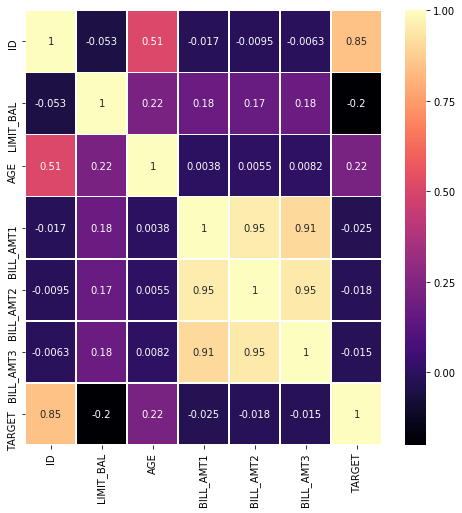

In [10]:
corr = train.corr()
df = pd.DataFrame(train.corr())
plt.figure(figsize=(8,8))
sns.heatmap(df, cmap='magma', linewidths=0.5, annot=True)
plt.show()

In [9]:
train1 = pd.get_dummies(train, columns=["MARRIAGE","EDUCATION", "SEX"], drop_first=True)
train1.head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,TARGET,MARRIAGE_Lainnya,MARRIAGE_Menikah,EDUCATION_Lainnya,EDUCATION_S2/S3,EDUCATION_SMA,SEX_Wanita
0,1,30000.0,40,24607.0,24430.0,23881.0,0,0,0,0,1,0,1
1,2,20000.0,41,17040.0,16474.0,17203.0,0,0,0,0,1,0,1
2,3,20000.0,36,17332.0,18600.0,17947.0,0,0,0,0,1,0,1
3,4,20000.0,35,2003.0,2948.0,3372.0,0,0,0,0,1,0,1
4,5,170000.0,38,171465.0,145196.0,110163.0,0,0,0,0,1,0,1


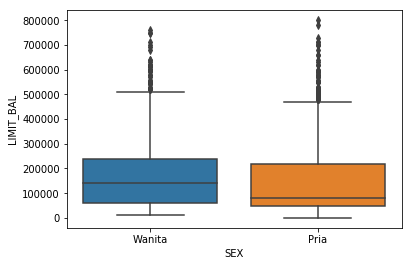

In [12]:
sns.boxplot(x='SEX',y='LIMIT_BAL',data=train) #mirip strip plot tapi data nyebar
plt.show()

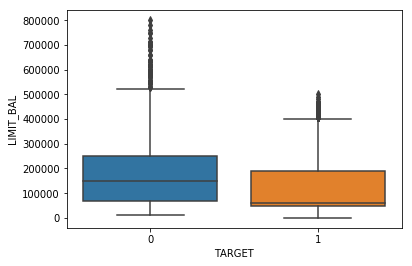

In [13]:
sns.boxplot(x='TARGET',y='LIMIT_BAL',data=train) #mirip strip plot tapi data nyebar
plt.show()

In [58]:
train1.describe()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,TARGET,MARRIAGE_Lainnya,MARRIAGE_Menikah,EDUCATION_Lainnya,EDUCATION_S2/S3,EDUCATION_SMA,SEX_Wanita
count,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000
mean,8313.000000,157608.781955,43.373955,50720.634827,48815.920662,46471.030556,0.399158,0.012331,0.452271,0.018767,0.242346,0.322346,0.588752
std,4799.368448,124931.062684,8.777974,73365.449060,70753.129768,68182.984755,0.489740,0.110361,0.497732,0.135705,0.428515,0.467389,0.492075
min,1.000000,0.000000,20.000000,-165580.000000,-69777.000000,-61506.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4157.000000,50000.000000,37.000000,3491.000000,2997.000000,2550.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8313.000000,120000.000000,42.000000,21943.000000,20987.000000,19954.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,12469.000000,230000.000000,49.000000,65903.000000,62725.000000,59111.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,16625.000000,800000.000000,72.000000,746814.000000,646770.000000,693131.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
train.describe()['LIMIT_BAL']

count     16625.000000
mean     157608.781955
std      124931.062684
min           0.000000
25%       50000.000000
50%      120000.000000
75%      230000.000000
max      800000.000000
Name: LIMIT_BAL, dtype: float64

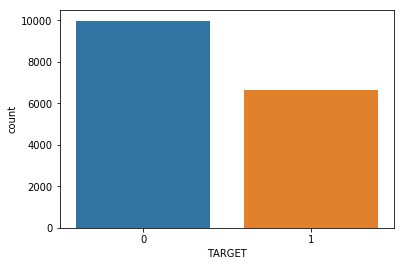

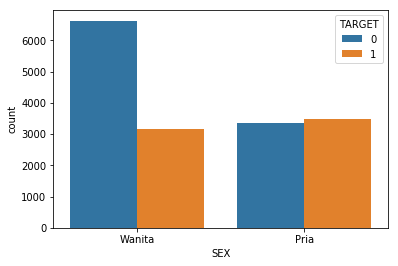

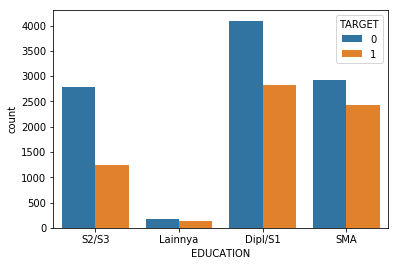

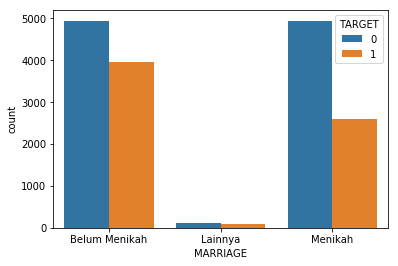

In [16]:
plt.figure()
sns.countplot(x='TARGET', data=train)
plt.show()

plt.figure()
sns.countplot(x='SEX', data=train, hue='TARGET')
plt.show()

plt.figure()
sns.countplot(x='EDUCATION', data=train, hue='TARGET')
plt.show()

plt.figure()
sns.countplot(x='MARRIAGE', data=train, hue='TARGET')
plt.show()

In [17]:
pd.crosstab(train['EDUCATION'],train['TARGET'],margins=True).style.background_gradient(cmap='summer_r')

TARGET,0,1,All
EDUCATION,,,
Dipl/S1,4095,2830,6925
Lainnya,179,133,312
S2/S3,2792,1237,4029
SMA,2923,2436,5359
All,9989,6636,16625


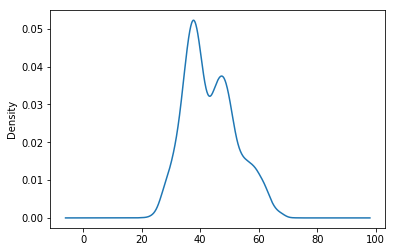

In [18]:
train["AGE"].plot.density()

### TRAIN TEST SPLIT

In [59]:
X = train1.drop(['ID', 'TARGET'], 1)
Y = train1['TARGET']
train1_x, test1_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=123)

### Logistic Regression Modeling

In [61]:
logreg = LogisticRegression(random_state = 123)
logreg.fit(train1_x, train1_y)
logregpred = logreg.predict(test1_x)

In [20]:
logreg = LogisticRegression(random_state = 123)
logreg.fit(train_x, train_y)
logregpred = logreg.predict(train_X)

### Summary

In [21]:
print('Intercept : \n', logreg.intercept_)
coef = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(np.transpose(logreg.coef_))], axis=1)
coef

Intercept : 
 [3.17165427e-05]


,0,0
0,LIMIT_BAL,-4.667422e-06
1,AGE,9.330389e-03
2,BILL_AMT1,-2.487720e-06
3,BILL_AMT2,8.406823e-07
4,BILL_AMT3,1.434884e-06
5,MARRIAGE_Lainnya,3.686544e-09
6,MARRIAGE_Menikah,-1.579152e-04
7,EDUCATION_Lainnya,5.497987e-06
8,EDUCATION_S2/S3,-1.538020e-04
9,EDUCATION_SMA,1.581145e-04


###### ODD RATIO adalah perbandingan natara odd ratio pada x=1 dengan odd pada x, sehingga, peluang perbandingan antara dia yang telat bayar maupun tidak telah jika

In [31]:
pred_y = logreg.predict(test_X)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(test_X, test_y)))

Accuracy of logistic regression classifier on test set: 0.63


In [33]:
cm = confusion_matrix(train_y, logregpred)

total = sum(sum(cm))
accurancy = (cm[0,0] +cm[1,1]) / total
sensitivity = cm[1,1] / (cm[1,0] + cm[1,1])
specificity = cm[0,0] / (cm[0,0] + cm[0,1])

print('Confusion Matrix: \n', cm)
print('Accurancy: ', accurancy)
print('Sensitivity: ', sensitivity)
print('Specificity: ', specificity)

Confusion Matrix: 
 [[5588 2349]
 [2626 2737]]
Accurancy:  0.6259398496240601
Sensitivity:  0.5103486854372553
Specificity:  0.7040443492503464


# DESICION TREE

In [64]:
decisiontree = DecisionTreeClassifier(random_state = 123)
decisiontree.fit(train1_x, train1_y)
dtpred = decisiontree.predict(train1_x)

### Confusion Matrix

In [65]:
cm1 = confusion_matrix(train1_y, dtpred)

total1 = sum(sum(cm1))
accurancy1 = (cm1[0,0] +cm1[1,1]) / total1
sensitivity1 = cm1[1,1] / (cm1[1,0] + cm1[1,1])
specificity1 = cm1[0,0] / (cm1[0,0] + cm1[0,1])

print('Confusion Matrix: \n', cm1)
print('Accurancy: ', accurancy1)
print('Sensitivity: ', sensitivity1)
print('Specificity: ', specificity1)

Confusion Matrix: 
 [[7936    1]
 [   8 5355]]
Accurancy:  0.9993233082706767
Sensitivity:  0.9985082975946299
Specificity:  0.9998740078115157


### Decision Tree Plot

In [66]:
features = train1_x.columns
dt = DecisionTreeClassifier(min_samples_split=4000, min_samples_leaf=70, random_state=123, max_depth=8)
dt.fit(train1_x, train1_y)
export_graphviz(dt, out_file='D:/dt.dot', feature_names = features, class_names = ["0","1"])

In [67]:
features = train1_x.columns
export_graphviz(dt,
               out_file = 'D:/dt.dot',
                feature_names = features,
                class_names = ["0", "1"])
## copy this note to www.webgraphviz.com

In [68]:
train1.head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,TARGET,MARRIAGE_Lainnya,MARRIAGE_Menikah,EDUCATION_Lainnya,EDUCATION_S2/S3,EDUCATION_SMA,SEX_Wanita
0,1,30000.0,40,24607.0,24430.0,23881.0,0,0,0,0,1,0,1
1,2,20000.0,41,17040.0,16474.0,17203.0,0,0,0,0,1,0,1
2,3,20000.0,36,17332.0,18600.0,17947.0,0,0,0,0,1,0,1
3,4,20000.0,35,2003.0,2948.0,3372.0,0,0,0,0,1,0,1
4,5,170000.0,38,171465.0,145196.0,110163.0,0,0,0,0,1,0,1


## FEATURE ENGINEERING LATIHAN

In [10]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV

In [11]:
x=train1.drop(['ID', 'TARGET', 'BILL_AMT1', 'BILL_AMT2'], 1)
y=train1['TARGET']
train1_x, test1_x, train1_y, test1_y = train_test_split(x, y, test_size=0.2, random_state = 123)

In [16]:
decisiontree = DecisionTreeClassifier(min_samples_split = 20, min_samples_leaf=20, random_state = 123)
decisiontree.fit(train1_x, train1_y)
dtpred = decisiontree.predict(test1_x)

In [13]:
train1_x.head()

,LIMIT_BAL,AGE,BILL_AMT3,MARRIAGE_Lainnya,MARRIAGE_Menikah,EDUCATION_Lainnya,EDUCATION_S2/S3,EDUCATION_SMA,SEX_Wanita
9927,80000.0,57,49662.0,0,1,0,1,0,1
5964,380000.0,40,100599.0,0,0,0,0,1,0
3874,50000.0,39,19596.0,0,1,0,1,0,0
9173,290000.0,47,86768.0,0,1,0,0,1,0
388,130000.0,36,0.0,0,0,0,1,0,1


In [17]:
cm4 = confusion_matrix(test1_y, dtpred)

total4 = sum(sum(cm4))
accurancy4 = (cm4[0,0] +cm4[1,1]) / total4
precision4 = cm4[1,1]/(cm4[0,1]+cm4[1,1])
sensitivity4 = cm4[1,1] / (cm4[1,0] + cm4[1,1])
specificity4 = cm4[0,0] / (cm4[0,0] + cm4[0,1])

print('Confusion Matrix: \n', cm4)
print('Accurancy: ', accurancy4)
print('Precision: ', precision4)
print('Sensitivity: ', sensitivity4)
print('Specificity: ', specificity4)

Confusion Matrix: 
 [[1777  275]
 [ 258 1015]]
Accurancy:  0.8396992481203007
Precision:  0.7868217054263565
Sensitivity:  0.7973291437549097
Specificity:  0.8659844054580896
